# House Price Prediction Data Science Project

This Data Science project predicts prices of houses in different areas of Carlifornia State based on various features extracted from the data.

These features include housing median age, total rooms, total bedrooms, population, households, ocean_proximity, median_income, longitude, latitude and median house value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\ojare\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the dataset
dataset = pd.read_csv("housing.csv")
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
# preparing and exploring data
print("Rows: ", dataset.shape[0])
print("Columns: ", dataset.shape[1], "\n")
print("Subset of the dataset: \n", dataset.head(), "\n" )

Rows:  20640
Columns:  10 

Subset of the dataset: 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200   



In [4]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
print(dataset.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [7]:
dataset = dataset.dropna(axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [8]:
print(dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


## Saving Figures as png Images

Below is an extra code that will save plot figures as png image files

In [9]:
# extra code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Check for duplicate values

In [10]:
print(dataset.duplicated().any())
duplicated_data = dataset.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

False
Number of duplicated data:  0


## Correlation

Correlation
median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


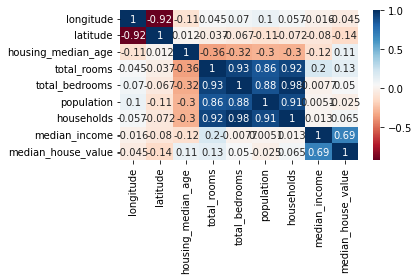

In [11]:
# check for correlation
import seaborn as sns

print("Correlation")
print(dataset.corr()["median_house_value"].sort_values(ascending=False))
sns.heatmap(dataset.corr(), annot=True, cmap="RdBu")
save_fig("correlation")
plt.show()

## Data Visualization

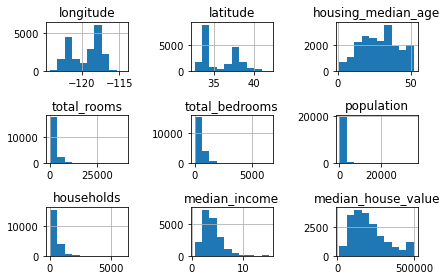

In [12]:
# plot a histogram to visualize the dataset
dataset.hist()
save_fig("house_price_data_visualization")
plt.show()

from the histograms above, total_rooms, total_bedrooms, population, households, median_income and median_house_value are negatively skewed while housing_median_age is positively skewed

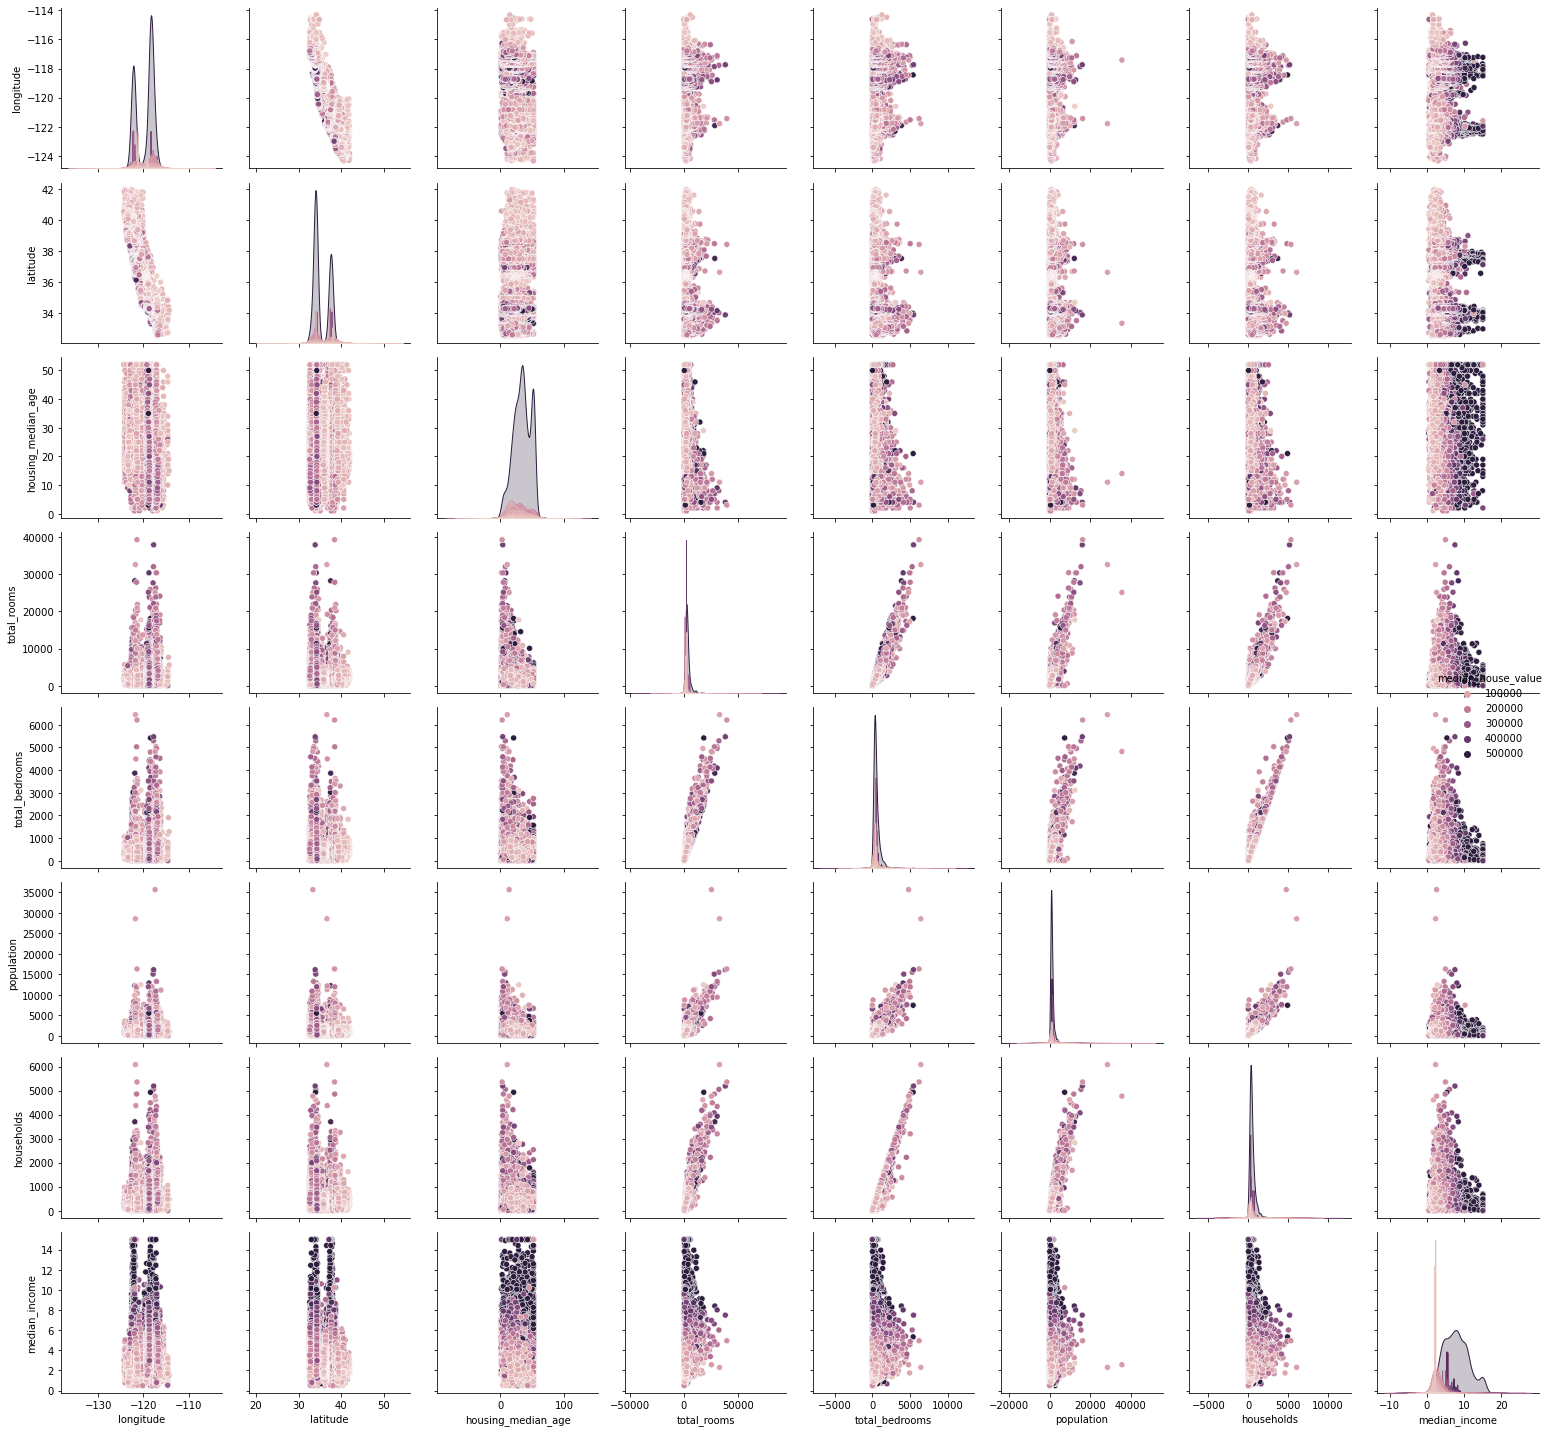

In [13]:
sns.pairplot(data=dataset, hue="median_house_value")
save_fig("pairplot")
plt.show()

In [16]:
dataset.drop("ocean_proximity", axis=1, inplace=True)
dataset

C:\Users\ojare\AppData\Local\Temp\ipykernel_4236\4279809236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop("ocean_proximity", axis=1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [17]:
# Handling categorical data

# encodings = data.groupby('Country')['Target Variable'].mean().reset_index()
# data = data.merge(encodings, how='left', on='Country')
# data.drop('Country', axis=1, inplace=True)

## Splitting the Dataset

In [19]:
X = dataset.drop("median_house_value", axis=1).values
y = dataset["median_house_value"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(16346, 8)
(16346,)


## Linear Regression

In [27]:
regressor = LinearRegression()

# fitting dataset
model = regressor.fit(X_train, y_train)

# prediction
prediction = regressor.predict(X_test)
print(prediction)

print("Train score: ", regressor.score(X_train, y_train))
print("Test score: ", regressor.score(X_test, y_test))

[197058.03752153 157508.79088918 202099.26270387 ... 131098.67538845
 155468.78077784 166363.59962368]
Train score:  0.6360185727313743
Test score:  0.640086568899374


## Support Vector Machine Algorithm

In [29]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM with c=100.0

svm = SVR(kernel="rbf", C=100.0)

# fitting data
svm.fit(X_train, y_train)

# prediction
prediction = svm.predict(X_test)
print(prediction)

print("Train score: ", svm.score(X_train, y_train))
print("Test score: ", svm.score(X_test, y_test))

[168274.21902415 200642.88982334 195298.81487241 ... 191006.91383875
 182708.48032731 192280.30602835]
Train score:  0.010984014583596768
Test score:  0.005845895735755113


## Random Forest Algorithm

In [30]:
regressor_1 = RandomForestRegressor()

# fitting dataset
model = regressor_1.fit(X_train, y_train)

# prediction
prediction = regressor_1.predict(X_test)
print(prediction)

print("Train score: ", regressor_1.score(X_train, y_train))
print("Test score: ", regressor_1.score(X_test, y_test))

[224034.03 156196.   197130.   ...  89896.   107591.   113730.  ]
Train score:  0.9746537863468238
Test score:  0.8216602699081561
